<a href="https://colab.research.google.com/github/BillDevData/Challenge-3-Data-Science/blob/main/Notebook_del_challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carga y lectura del Dataset

In [1]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/BillDevData/Challenge-3-Data-Science/refs/heads/main/datos_procesados.csv'
datos = pd.read_csv(url)
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1446,2137-DQMEV,False,Male,False,True,True,68,False,No phone service,DSL,...,No,No,Yes,No,One year,False,Mailed check,44.80,2983.65,1.49
6669,9496-IVVRP,False,Female,False,True,True,11,True,No,DSL,...,No,No,No,No,Month-to-month,False,Bank transfer (automatic),51.00,581.70,1.70
5580,7873-CVMAW,False,Male,False,False,False,72,True,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,False,Credit card (automatic),88.55,6362.35,2.95
2598,3717-FDJFU,False,Male,False,False,True,5,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.45,106.90,0.68
6854,9753-OYLBX,False,Female,False,False,False,1,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,20.50,20.50,0.68
5915,8345-MVDYC,False,Female,False,False,False,45,True,No,DSL,...,Yes,Yes,Yes,Yes,Two year,False,Bank transfer (automatic),81.65,3618.70,2.72
1602,2332-TODQS,False,Female,False,False,False,48,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),25.05,1171.50,0.84
5150,7253-UVNDW,True,Female,False,False,False,46,True,No,DSL,...,Yes,Yes,No,No,Two year,False,Credit card (automatic),54.35,2460.15,1.81
3428,4873-ILOLJ,True,Male,False,False,False,24,True,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,True,Electronic check,90.35,2238.50,3.01
2259,3237-AJGEH,True,Female,False,True,True,3,False,No phone service,DSL,...,No,Yes,No,No,Month-to-month,True,Mailed check,31.00,95.05,1.03


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Depurando columnas redundantes y de baja relevancia

In [5]:
# Columnas a eliminar
cols_drop = [
    'customerID',       # por ser identificador único
    'Charges.Total',    # puede redundar con tenure
    'Cuentas_Diarias',  # derivada de gasto mensual
    'PhoneService'      # nos quedamos solo con MultipleLines, que tiene la misma información, pero más detallada
]

datos_depurados = datos.drop(columns=cols_drop).copy()
datos_depurados

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,False,Female,False,True,True,9,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.60
1,False,Male,False,False,False,9,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.90
2,True,Male,False,False,False,4,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.90
3,True,Male,True,True,False,13,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00
4,True,Female,True,True,False,3,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,Female,False,False,False,13,No,DSL,Yes,No,No,Yes,No,No,One year,False,Mailed check,55.15
7028,True,Male,False,True,False,22,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,True,Electronic check,85.10
7029,False,Male,False,False,False,2,No,DSL,No,Yes,No,No,No,No,Month-to-month,True,Mailed check,50.30
7030,False,Male,False,True,True,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,False,Mailed check,67.85


### Codificando las columnas categóricas

In [17]:
datos_depurados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
categorical_cols = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(datos_depurados[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=datos_depurados.index)

numerical_bool_cols = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'Charges.Monthly']
datos_codificados = pd.concat([datos_depurados[numerical_bool_cols], encoded_df], axis=1)

datos_codificados

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,False,True,True,9,True,65.60,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,False,False,False,False,9,False,59.90,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,True,False,False,False,4,True,73.90,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,True,True,True,False,13,True,98.00,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,True,True,True,False,3,True,83.90,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,13,False,55.15,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,True,False,True,False,22,True,85.10,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7029,False,False,False,False,2,True,50.30,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7030,False,False,True,True,67,False,67.85,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   bool   
 1   SeniorCitizen                          7032 non-null   bool   
 2   Partner                                7032 non-null   bool   
 3   Dependents                             7032 non-null   bool   
 4   tenure                                 7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   bool   
 6   Charges.Monthly                        7032 non-null   float64
 7   gender_Male                            7032 non-null   float64
 8   MultipleLines_No phone service         7032 non-null   float64
 9   MultipleLines_Yes                      7032 non-null   float64
 10  InternetService_Fiber optic            7032 non-null   float64
 11  Inte

### Balanceando

In [22]:
churn_percent = datos_codificados['Churn'].value_counts(normalize=True) * 100
churn_percent

,proportion
Churn,
False,73.421502
True,26.578498


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X = datos_codificados.drop(columns=['Churn'])
y = datos_codificados['Churn']

smote = SMOTE(random_state=42)

X_over, y_over = smote.fit_resample(X, y)

In [26]:
y_over.value_counts(normalize=True) * 100

,proportion
Churn,
False,50.0
True,50.0


In [30]:
y_over.shape

(10326,)

In [31]:
X_over.shape

(10326, 28)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_over_scaled = scaler.fit_transform(X_over)

X_over_scaled

array([[-0.55340931,  1.02074585,  1.57340314, ..., -0.48550648,
        -0.88185472,  2.00115948],
       [-0.55340931, -0.97967579, -0.63556502, ..., -0.48550648,
        -0.88185472,  2.00115948],
       [-0.55340931, -0.97967579, -0.63556502, ..., -0.48550648,
         1.21266423, -0.52364337],
       ...,
       [ 1.80698082,  1.02074585,  1.57340314, ..., -0.48550648,
         1.21266423, -0.52364337],
       [ 1.80698082,  1.02074585,  1.57340314, ..., -0.48550648,
         1.21266423, -0.52364337],
       [-0.55340931, -0.97967579, -0.63556502, ..., -0.48550648,
        -0.88185472,  0.24028215]])

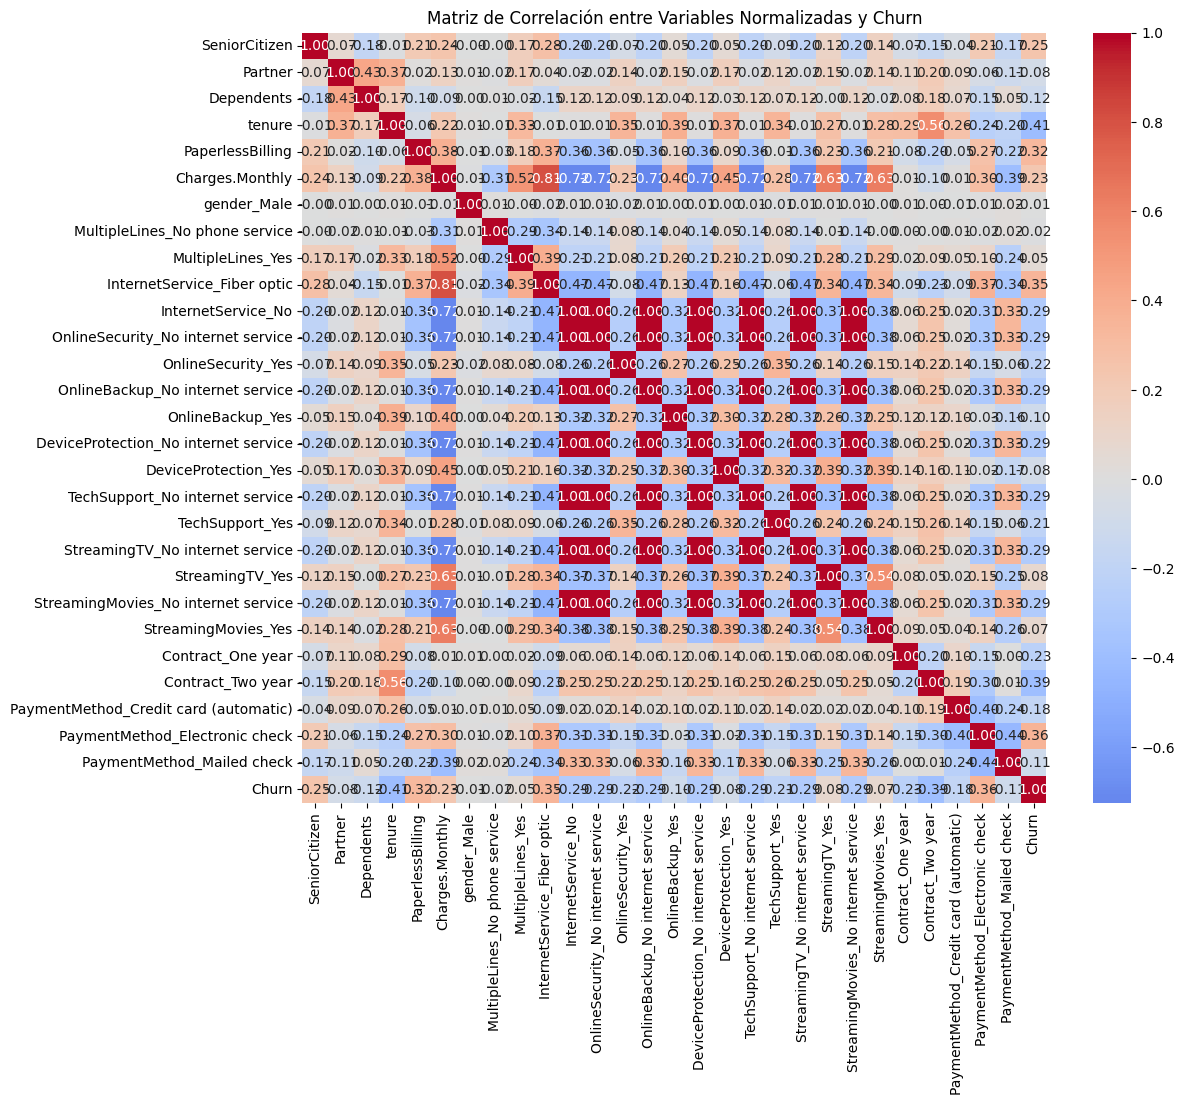

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir X_over_scaled a DataFrame para poder trabajar con columnas
X_scaled_df = pd.DataFrame(X_over_scaled, columns=X_over.columns, index=X_over.index)

# Concatenar con y_over para ver la correlación con Churn
data_corr = pd.concat([X_scaled_df, y_over.rename('Churn')], axis=1)

# Calcular la matriz de correlación
corr_matrix = data_corr.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación entre Variables Normalizadas y Churn")
plt.show()


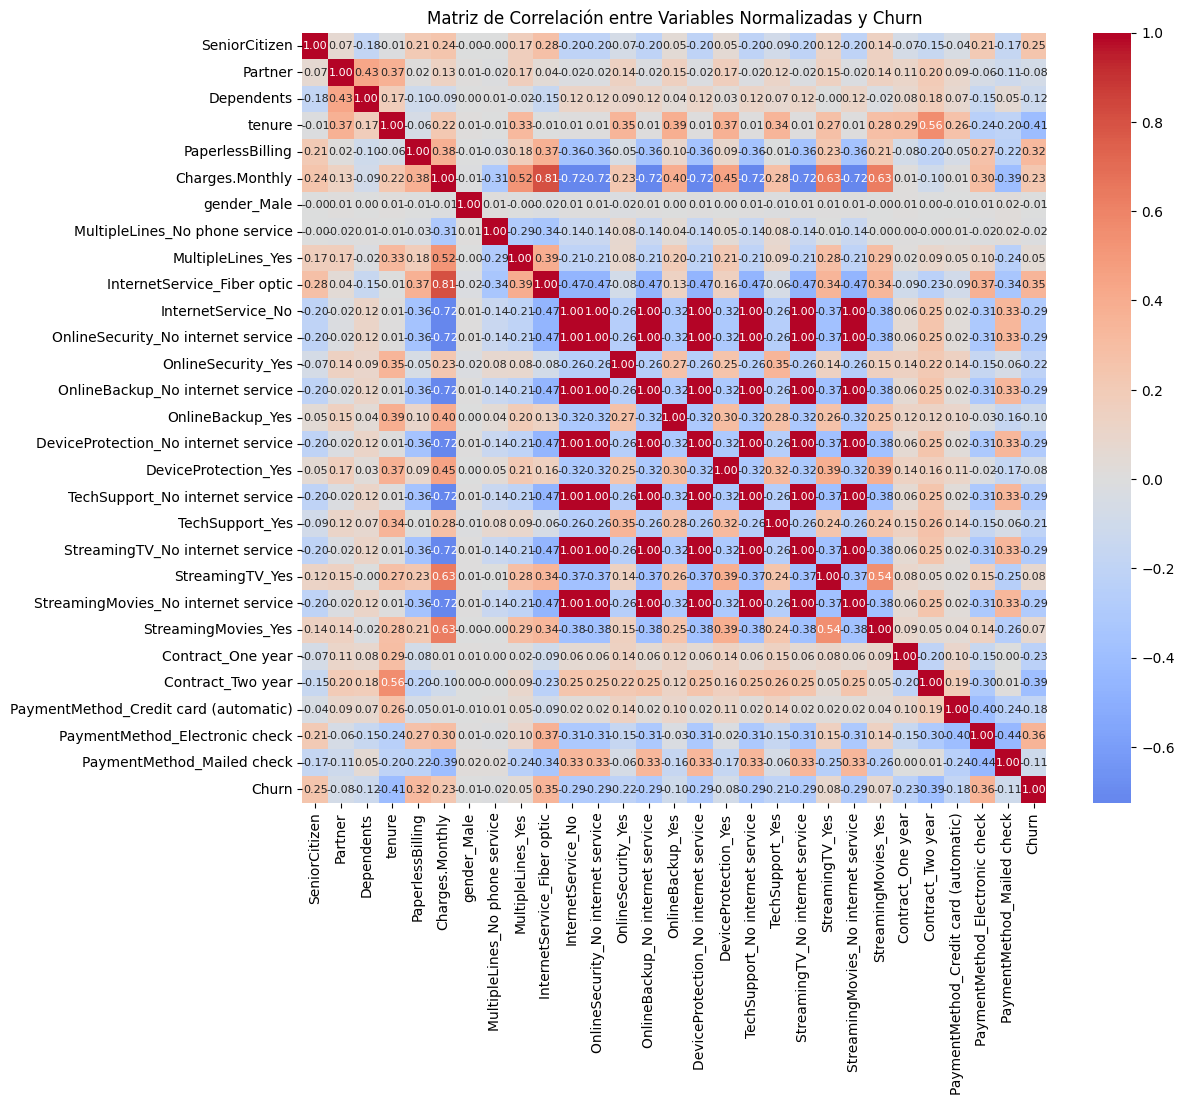

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    annot_kws={"size": 8}  # Tamaño de los números
)
plt.title("Matriz de Correlación entre Variables Normalizadas y Churn")
plt.show()
